In [ ]:
from src.manipulator import REPAEManipulator, DiffusionCandidateList
import torch
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

## Diffusion Example
This notebooks shows how to manipulate the diffusion process in Latent Diffusion Models.

In [ ]:
manipulator = REPAEManipulator(
    image_resolution=256,
    model_file="../models/generators/ldm_im.pt"
)
device = manipulator._device  # Select device used in manipulation

In [3]:
candidates = DiffusionCandidateList.from_diffusion_output(*manipulator.get_diff_steps([1,2])) # Get diffusion history and class embedding for two different classes.

In [4]:
n_steps = len(candidates[0].xt)-1 # Get number of steps in diffusion

In [7]:
"""Here we make the manipulation strategy which takes 1 of the original in all steps except the ones defined below."""
weights_x = [torch.tensor([1,0], device=device)] * n_steps
weights_y = [torch.tensor([1,0], device=device)] * n_steps

for e in [0,1,2,3,4]:  # This steps we do some actual manipulation.
    weights_x[e] = torch.tensor([0.2,0.8], device=device)
    weights_y[e] = torch.tensor([0.2,0.8], device=device)

x_cur = manipulator.manipulate(candidates, weights_x, weights_y)

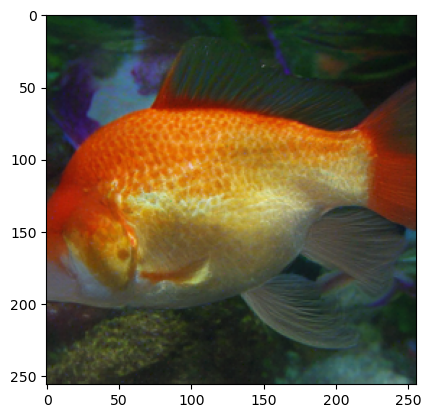

In [8]:
plt.imshow(manipulator.get_image(x_cur)[0].cpu().numpy())  # Show generated image